In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/funnyhaha/outputCorrect.txt
/kaggle/input/funnyhaha/output.txt
/kaggle/input/funnyhehe/output (1).txt
/kaggle/input/funnyhehe/outputCorrect (1).txt


In [2]:
filename = "/kaggle/input/funnyhehe/outputCorrect (1).txt"
with open(filename) as f:
    dataCor = f.read()
filename = "/kaggle/input/funnyhehe/output (1).txt"
with open(filename) as f:
    dataAnom = f.read()

anomDif = []
corDif = []

# use split 
strTemp = ""
num = []
print(len(dataAnom))
for i in range(len(dataAnom)):
    if(dataAnom[i] == '['):
        i += 2
        num = []
        while(dataAnom[i] != ']'):
            # read data until space
            if(dataAnom[i] == " "):
                num.append(int(strTemp))
                strTemp = ""
            else:
                strTemp.append(dataAnom[i])
            i += 1
        print(num)
        i +=3
        

In [3]:
# split here
crush2 = dataAnom.replace('\n', '')
crush = crush2.split("[[")
crush.remove(crush[0])
for i in range(len(crush)):
    crush[i] = crush[i][:len(crush[i])-2]

# Have 2d array, first dimension is the paths, second is the dists
anomList = []
for i in range(len(crush)): # cycle through paths
    loCrush = crush[i].split(" ")
    tmpList = []
    for j in range(len(loCrush)):
        # cycle through individual dists
        if(loCrush[j] != ""):
            tmpList.append(float(loCrush[j]))
    anomList.append(tmpList)


In [4]:
# do the same for correct list
crush2 = dataCor.replace('\n', '')
crush = crush2.split("[[")
crush.remove(crush[0])
for i in range(len(crush)):
    crush[i] = crush[i][:len(crush[i])-2]

# Have 2d array, first dimension is the paths, second is the dists
corList = []
for i in range(len(crush)): # cycle through paths
    loCrush = crush[i].split(" ")
    tmpList = []
    for j in range(len(loCrush)):
        # cycle through individual dists
        if(loCrush[j] != ""):
            tmpList.append(float(loCrush[j]))
    corList.append(tmpList)
    
print(corList[0])

[0.762222, 0.13576078, 0.37421572, 1.8470057, 1.7299874, 2.427673, 2.257277, 4.173791, 4.7428703, 4.7428703, 4.0744867, 4.0744867, 2.3346322, 11.052943, 19.483086, 19.25739, 20.362177, 20.58962, 21.365837, 20.552822, 22.58574, 22.37641, 23.878986, 23.667553]


In [5]:
from statistics import median

# Find max and average of all paths
anomMax = []
anomAvg = []
anomMed = []
anomSum = []

def Average(myList): 
    return (sum(myList) / len(myList)) 

for i in range(len(anomList)):
    anomMax.append(max(anomList[i]))
    anomAvg.append(Average(anomList[i]))
    anomMed.append(median(anomList[i]))
    anomSum.append(sum(anomList[i]))
print(Average(anomMax))
print(Average(anomAvg))
print(Average(anomMed))
print(Average(anomSum))

19.426879266250015
9.354559864632284
8.93746350685626
224.50943675117506


In [6]:
from statistics import median

# Find max and average of all paths
corMax = []
corAvg = []
corMed = []
corSum = []

def Average(myList): 
    return (sum(myList) / len(myList)) 

for i in range(len(corList)):
    corMax.append(max(corList[i]))
    corAvg.append(Average(corList[i]))
    corMed.append(median(corList[i]))
    corSum.append(sum(corList[i]))
print(Average(corMax))
print(Average(corAvg))
print(Average(corMed))
print(Average(corSum))

16.2713758271104
7.434801361016594
6.9248100656198135
178.4352326643982


I will use average path distance off. Using sum depends highly on the path length, and max is a more skewed representation. Median may be used later.

In [8]:
# sampled 32 paths for each of 332 correct paths and 25 anomalies. 
print(len(corAvg) / 32)
print(len(anomAvg) / 32)

361.0
25.0


In [9]:
# Time to find average prediction error per unique path
pathCorAvg = []
pathAnomAvg = []

tmpCor = []
tmpAnom = []
for i in range(len(corAvg)):
    if(i % 32 == 0):
        if(i != 0):
            pathCorAvg.append(Average(tmpCor))
            tmpCor = []
    tmpCor.append(corAvg[i])

for i in range(len(anomAvg)):
    if(i % 32 == 0):
        if(i != 0):
            pathAnomAvg.append(Average(tmpAnom))
            tmpAnom = []
    tmpAnom.append(anomAvg[i])

In [10]:
pathCorAvg.sort()
pathAnomAvg.sort()
print(pathAnomAvg)

[0.26043851059895823, 0.9508416269140625, 0.9626533509895834, 1.682648572317708, 1.9531439007942701, 3.697947887395834, 4.874519906158856, 5.64260954731771, 6.309645784505208, 6.311963156666668, 6.453459038007813, 7.381123993463541, 7.769718116536461, 7.864134940807293, 9.370624301341147, 9.684870922395833, 10.165946220052081, 12.252125673476561, 13.815519076067703, 14.507816728307292, 17.07317999515625, 20.61330963609375, 26.60985441848959, 32.51955342723957]


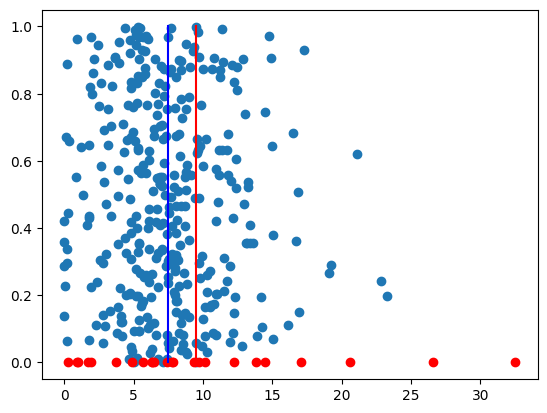

In [11]:
# Graph Time
import matplotlib.pyplot as plt
from random import random
y1 = np.zeros(len(pathCorAvg))
y2 = np.zeros(len(pathAnomAvg))
for i in range(len(pathCorAvg)):
    y1[i] = random()

# average error
avgErrorCor = Average(pathCorAvg)
avgErrorAnom = Average(pathAnomAvg)

# plot points
plt.scatter(pathCorAvg, y1)
plt.scatter(pathAnomAvg, y2, c="red")
plt.plot([avgErrorCor, avgErrorCor], [0, 1], c = "blue")
plt.plot([avgErrorAnom, avgErrorAnom], [0, 1], c = "red")
plt.show()

In [12]:
print("Random Guessing Would Get You ", float(25/332)*100, "% of paths.\n\n")

maxF1 = 0.0
useCutoff = 0.0
btp = 0.0
btn = 0.0
bfp = 0.0
bfn = 0.0

for i in range(len(pathAnomAvg)):
    # cycle through each cutoff point, finding how many errors would occur
    print("Anomalies Detected: ", len(pathAnomAvg) - i)
    cutoff = pathAnomAvg[i]
    print("Cutoff Point:", cutoff)
    corPredict = 0
    
    for j in range(len(pathCorAvg)):
        if(pathCorAvg[j] < cutoff):
            # not anomaly
            corPredict += 1
    print("Anomalies Detected in Correct Paths:", len(pathCorAvg) - corPredict)
    print("Percentage of Anomalies Detected: ", float((len(pathAnomAvg) - i) / len(pathAnomAvg)))
    print("Percentage of Correct Paths Classified Correctly: ", float(corPredict / len(pathCorAvg)))
    try:
        print("Percent of Predicted Anomalous Paths Actually Being Anomalous: ", float((len(pathAnomAvg) - i) / ((len(pathAnomAvg) - i) + (len(pathCorAvg) - corPredict)))
    except:
        print("Percent of Predicted Anomalous Paths Actually Being Anomalous: 0")
        
    tp = len(pathAnomAvg) - i
    tn = corPredict
    fp = len(pathCorAvg) - corPredict
    fn = i
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print("F1_Score: ", f1_score)
    if(f1_score > maxF1):
        maxF1 = f1_score
        useCutoff = cutoff
        btp = tp
        btn = tn
        bfp = fp
        bfn = fn
    print("\n\n")
print("Cutoff of ", useCutoff, " provides the highest F1 score of ", maxF1, ".")

Random Guessing Would Get You  7.530120481927711 % of paths.


Anomalies Detected:  24
Cutoff Point: 0.26043851059895823
Anomalies Detected in Correct Paths: 350
Percentage of Anomalies Detected:  1.0
Percentage of Correct Paths Classified Correctly:  0.027777777777777776
Percent of Predicted Anomalous Paths Actually Being Anomalous:  0.06857142857142857
F1_Score:  0.1206030150753769



Anomalies Detected:  23
Cutoff Point: 0.9508416269140625
Anomalies Detected in Correct Paths: 347
Percentage of Anomalies Detected:  0.9583333333333334
Percentage of Correct Paths Classified Correctly:  0.03611111111111111
Percent of Predicted Anomalous Paths Actually Being Anomalous:  0.06628242074927954
F1_Score:  0.116751269035533



Anomalies Detected:  22
Cutoff Point: 0.9626533509895834
Anomalies Detected in Correct Paths: 346
Percentage of Anomalies Detected:  0.9166666666666666
Percentage of Correct Paths Classified Correctly:  0.03888888888888889
Percent of Predicted Anomalous Paths Actually Be

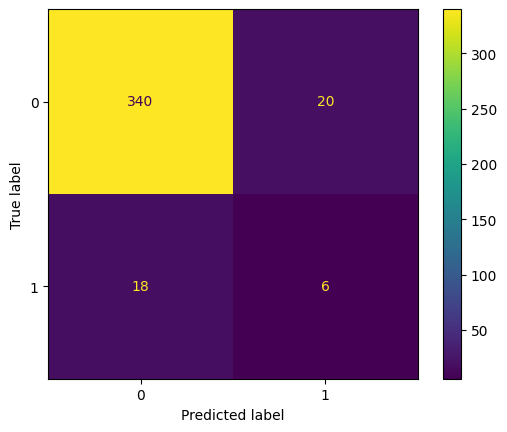

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
real = []
pred = []

for i in range(btp):
    real.append(1)
    pred.append(1)
for i in range(btn):
    real.append(0)
    pred.append(0)
for i in range(bfp):
    real.append(0)
    pred.append(1)
for i in range(bfn):
    real.append(1)
    pred.append(0)

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(real, pred))
disp.plot()

The above is better than random guessing (~7.5%) with a chill 14% of anomalous paths to correct paths being found in the middle (7 anomalies with 49 non anomalies detected as anomalies). If we go to the extremes, we can reach a 33% rate, but this is only getting a single anomaly for and clasifying 3 correct paths as anomalous.

Surely, we can do better.

In [14]:
# Idea: Take the worst N (in this case, four) samples and use them as the average
# path error. The idea is that the worst samples for anomalous paths should be far
# more extreme than the worst samples for a non anomalous path.

In [14]:
tmp = [0,1,2,3]
N = 1
print(tmp[-N:])
print(tmp[:N])

[3]
[0]


In [15]:
# Time to find average prediction error per unique path (best path)
N = 1
pathCorAvg = []
pathAnomAvg = []

tmpCor = []
tmpAnom = []
for i in range(len(corAvg)):
    if(i % 32 == 0):
        if(i != 0):
            tmpCor.sort()
            # Grab N best predictions (lowest errors)
            tmpCor = tmpCor[:N]
            pathCorAvg.append(Average(tmpCor))
            tmpCor = []
    tmpCor.append(corAvg[i])

for i in range(len(anomAvg)):
    if(i % 32 == 0):
        if(i != 0):
            tmpAnom.sort()
            # Grab N best predictions
            tmpAnom = tmpAnom[:N]
            pathAnomAvg.append(Average(tmpAnom))
            tmpAnom = []
    tmpAnom.append(anomAvg[i])
    

In [16]:
pathCorAvg.sort()
pathAnomAvg.sort()
print(pathAnomAvg)

[0.07246213208333334, 0.6488201654166666, 0.7053467329166668, 0.8217163229166666, 1.21242432875, 1.4299852291666666, 1.7096269691666668, 1.9048021379166666, 1.9942274791666668, 2.0542465, 2.185347049166667, 2.5705107858333327, 2.905993570833333, 2.9434658625000005, 2.9539057570833336, 3.248385520833333, 3.8707500424999997, 5.005471499166666, 5.659635199583334, 5.772086716666666, 10.314477075000001, 14.215242980416663, 16.608824654166664, 19.66334729166667]


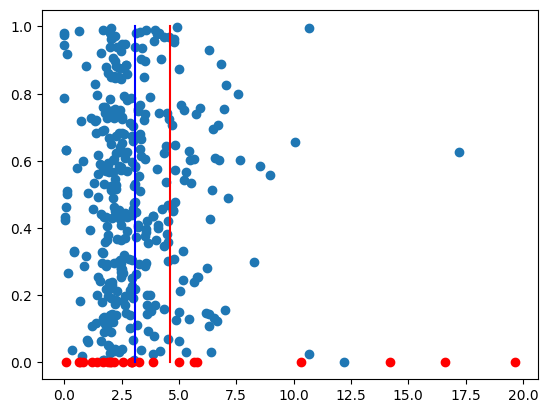

In [17]:
# Graph Time
import matplotlib.pyplot as plt
from random import random
y1 = np.zeros(len(pathCorAvg))
y2 = np.zeros(len(pathAnomAvg))
for i in range(len(pathCorAvg)):
    y1[i] = random()
    
# average error
avgErrorCor = Average(pathCorAvg)
avgErrorAnom = Average(pathAnomAvg)

# plot points
plt.scatter(pathCorAvg, y1)
plt.scatter(pathAnomAvg, y2, c="red")
plt.plot([avgErrorCor, avgErrorCor], [0, 1], c = "blue")
plt.plot([avgErrorAnom, avgErrorAnom], [0, 1], c = "red")
plt.show()

In [18]:
print("Random Guessing Would Get You ", float(25/332)*100, "% of paths.\n\n")

maxF1 = 0.0
useCutoff = 0.0
btp = 0.0
btn = 0.0
bfp = 0.0
bfn = 0.0

for i in range(len(pathAnomAvg)):
    # cycle through each cutoff point, finding how many errors would occur
    print("Anomalies Detected: ", len(pathAnomAvg) - i)
    cutoff = pathAnomAvg[i]
    print("Cutoff Point:", cutoff)
    corPredict = 0
    
    for j in range(len(pathCorAvg)):
        if(pathCorAvg[j] < cutoff):
            # not anomaly
            corPredict += 1
    print("Anomalies Detected in Correct Paths:", len(pathCorAvg) - corPredict)
    print("Percentage of Anomalies Detected: ", float((len(pathAnomAvg) - i) / len(pathAnomAvg)))
    print("Percentage of Correct Paths Classified Correctly: ", float(corPredict / len(pathCorAvg)))
    try:
        print("Percent of Predicted Anomalous Paths Actually Being Anomalous: ", float((len(pathAnomAvg) - i) / ((len(pathAnomAvg) - i) + (len(pathCorAvg) - corPredict))))
    except:
        print("Percent of Predicted Anomalous Paths Actually Being Anomalous: 0")
    
    tp = len(pathAnomAvg) - i
    tn = corPredict
    fp = len(pathCorAvg) - corPredict
    fn = i
        
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print("F1_Score: ", f1_score)
    if(f1_score > maxF1):
        maxF1 = f1_score
        useCutoff = cutoff
        btp = tp
        btn = tn
        bfp = fp
        bfn = fn
    print("\n\n")
print("Cutoff of ", useCutoff, " provides the highest F1 score of ", maxF1, ".")

Random Guessing Would Get You  7.530120481927711 % of paths.


Anomalies Detected:  24
Cutoff Point: 0.07246213208333334
Anomalies Detected in Correct Paths: 353
Percentage of Anomalies Detected:  1.0
Percentage of Correct Paths Classified Correctly:  0.019444444444444445
Percent of Predicted Anomalous Paths Actually Being Anomalous:  0.0679886685552408
F1_Score:  0.11970074812967581



Anomalies Detected:  23
Cutoff Point: 0.6488201654166666
Anomalies Detected in Correct Paths: 342
Percentage of Anomalies Detected:  0.9583333333333334
Percentage of Correct Paths Classified Correctly:  0.05
Percent of Predicted Anomalous Paths Actually Being Anomalous:  0.06725146198830409
F1_Score:  0.11825192802056557



Anomalies Detected:  22
Cutoff Point: 0.7053467329166668
Anomalies Detected in Correct Paths: 341
Percentage of Anomalies Detected:  0.9166666666666666
Percentage of Correct Paths Classified Correctly:  0.05277777777777778
Percent of Predicted Anomalous Paths Actually Being Anomalous

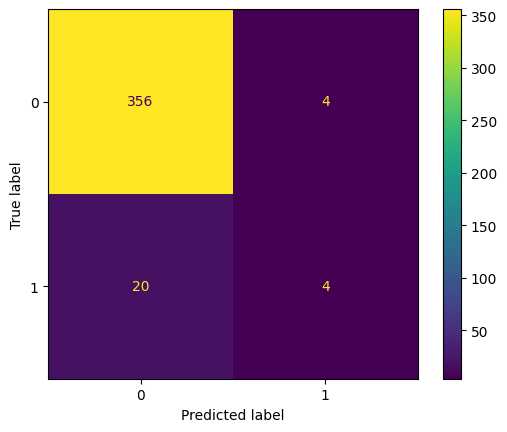

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
real = []
pred = []

for i in range(btp):
    real.append(1)
    pred.append(1)
for i in range(btn):
    real.append(0)
    pred.append(0)
for i in range(bfp):
    real.append(0)
    pred.append(1)
for i in range(bfn):
    real.append(1)
    pred.append(0)

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(real, pred))
disp.plot()

In [21]:
# Time to find average prediction error per unique path (worst path)
N = 1
pathCorAvg = []
pathAnomAvg = []

tmpCor = []
tmpAnom = []
for i in range(len(corAvg)):
    if(i % 32 == 0):
        if(i != 0):
            tmpCor.sort()
            # Grab N worst predictions
            tmpCor = tmpCor[-N:]
            pathCorAvg.append(Average(tmpCor))
            tmpCor = []
    tmpCor.append(corAvg[i])

for i in range(len(anomAvg)):
    if(i % 32 == 0):
        if(i != 0):
            tmpAnom.sort()
            # Grab N worst predictions
            tmpAnom = tmpAnom[-N:]
            pathAnomAvg.append(Average(tmpAnom))
            tmpAnom = []
    tmpAnom.append(anomAvg[i])
    

In [22]:
pathCorAvg.sort()
pathAnomAvg.sort()
print(pathAnomAvg)

[0.7720116249999999, 1.2598095454166667, 1.51085678, 2.945066774583333, 7.706085870833333, 12.208764287500003, 13.982704268749998, 14.026575725, 15.035246876666667, 16.641871699166668, 16.796487024166662, 17.055595168333337, 18.068705770833333, 20.022730562499998, 20.045583499999996, 22.317083545833338, 25.692891755416664, 27.409531333333334, 27.468907077083333, 27.668978637500004, 29.675997350000006, 32.221441125, 41.93239005416666, 52.43727866666668]


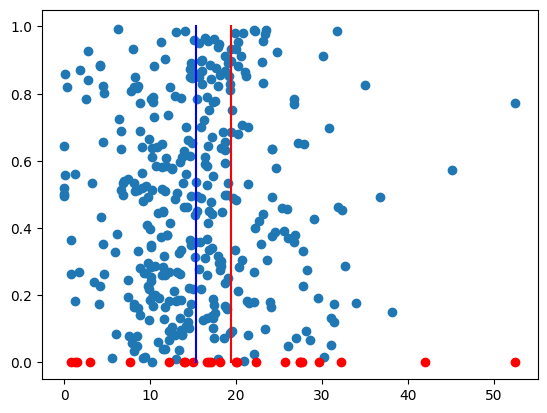

In [23]:
# Graph Time
import matplotlib.pyplot as plt
from random import random
y1 = np.zeros(len(pathCorAvg))
y2 = np.zeros(len(pathAnomAvg))
for i in range(len(pathCorAvg)):
    y1[i] = random()
    
# average error
avgErrorCor = Average(pathCorAvg)
avgErrorAnom = Average(pathAnomAvg)

# plot points
plt.scatter(pathCorAvg, y1)
plt.scatter(pathAnomAvg, y2, c="red")
plt.plot([avgErrorCor, avgErrorCor], [0, 1], c = "blue")
plt.plot([avgErrorAnom, avgErrorAnom], [0, 1], c = "red")
plt.show()

In [24]:
print("Random Guessing Would Get You ", float(25/332)*100, "% of paths.\n\n")

maxF1 = 0.0
useCutoff = 0.0
btp = 0.0
btn = 0.0
bfp = 0.0
bfn = 0.0

for i in range(len(pathAnomAvg)):
    # cycle through each cutoff point, finding how many errors would occur
    print("Anomalies Detected: ", len(pathAnomAvg) - i)
    cutoff = pathAnomAvg[i]
    print("Cutoff Point:", cutoff)
    corPredict = 0
    
    for j in range(len(pathCorAvg)):
        if(pathCorAvg[j] < cutoff):
            # not anomaly
            corPredict += 1
    print("Anomalies Detected in Correct Paths:", len(pathCorAvg) - corPredict)
    print("Percentage of Anomalies Detected: ", float((len(pathAnomAvg) - i) / len(pathAnomAvg)))
    print("Percentage of Correct Paths Classified Correctly: ", float(corPredict / len(pathCorAvg)))
    try:
        print("Percent of Predicted Anomalous Paths Actually Being Anomalous: ", float((len(pathAnomAvg) - i) / ((len(pathAnomAvg) - i) + (len(pathCorAvg) - corPredict))))
    except:
        print("Percent of Predicted Anomalous Paths Actually Being Anomalous: 0")
    
    tp = len(pathAnomAvg) - i
    tn = corPredict
    fp = len(pathCorAvg) - corPredict
    fn = i
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print("F1_Score: ", f1_score)
    if(f1_score > maxF1):
        maxF1 = f1_score
        useCutoff = cutoff
        btp = tp
        btn = tn
        bfp = fp
        bfn = fn
    print("\n\n")
print("Cutoff of ", useCutoff, " provides the highest F1 score of ", maxF1, ".")

Random Guessing Would Get You  7.530120481927711 % of paths.


Anomalies Detected:  24
Cutoff Point: 0.7720116249999999
Anomalies Detected in Correct Paths: 352
Percentage of Anomalies Detected:  1.0
Percentage of Correct Paths Classified Correctly:  0.022222222222222223
Percent of Predicted Anomalous Paths Actually Being Anomalous:  0.06818181818181818
F1_Score:  0.12



Anomalies Detected:  23
Cutoff Point: 1.2598095454166667
Anomalies Detected in Correct Paths: 351
Percentage of Anomalies Detected:  0.9583333333333334
Percentage of Correct Paths Classified Correctly:  0.025
Percent of Predicted Anomalous Paths Actually Being Anomalous:  0.06552706552706553
F1_Score:  0.1155778894472362



Anomalies Detected:  22
Cutoff Point: 1.51085678
Anomalies Detected in Correct Paths: 349
Percentage of Anomalies Detected:  0.9166666666666666
Percentage of Correct Paths Classified Correctly:  0.030555555555555555
Percent of Predicted Anomalous Paths Actually Being Anomalous:  0.06303724928366762

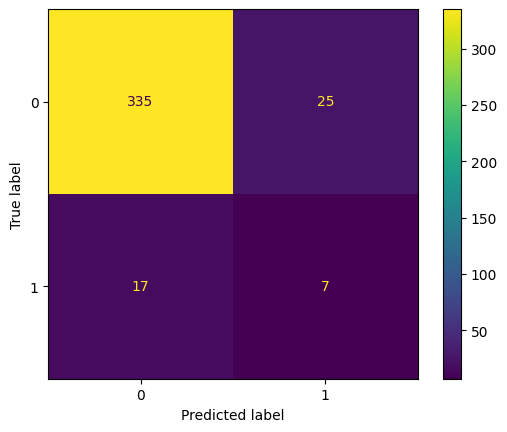

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
real = []
pred = []

for i in range(btp):
    real.append(1)
    pred.append(1)
for i in range(btn):
    real.append(0)
    pred.append(0)
for i in range(bfp):
    real.append(0)
    pred.append(1)
for i in range(bfn):
    real.append(1)
    pred.append(0)

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(real, pred))
disp.plot()

Standard: 0.06 until 14 anom, 0.10 until 11 anom, 0.14 until 5 anom, 0.26 until 0 anom
Cutoff of  15.875722090338542  provides the highest F1 score of  0.2380952380952381.
[[318] [13]
 [19]  [5]]

Worst path (highest error): 0.06 until 14 anom, 0.1 until 4 anom, 0.15 avg until 0 anom
Cutoff of  22.365358212500002  provides the highest F1 score of  0.19780219780219782.
[[273] [58]
 [15]  [9]

Best path (lowest error): 0.06 to 0.9 as you move toward 11 anom, then 0.15 until 6 anom, then 6 anom performs garbage, then 0.25 until 0 anom
Cutoff of  9.862143618749998  provides the highest F1 score of  0.24242424242424243 .
[[326] [5]
 [20]  [4]]


So best and standard work better for predicting just a few points (a few anomalies and a few correct predictions classified as anomalous) whereas the worst works better for predicting a higher amount of points (a lot of anomalies, but also a lot of correct predictions classified as anomalous).

Notes:  

Preprocessing should be stricter.

Training should be longer.

Paths (maybe?) should have greater predicted lengths, to see if prediction tapers off for anomalous paths.

Paths (maybe?) should have many more predicted samples, to increase the average distance between anomalous and nomalous paths.
